# <center><h1> FRUIT RECOGNATION CAPSTONE PROJECT<h1> <center/>

In [8]:
# Adding Kaggle.json to access kaggleAPI
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
#download the dataset
! kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [02:59<00:00, 22.1MB/s]
100% 3.58G/3.58G [02:59<00:00, 21.4MB/s]


In [10]:
import zipfile

In [11]:
!unzip fruits-fresh-and-rotten-for-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.21 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.31 PM.png  
  inflating: dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07

In [13]:
!pip install pillow
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

In [15]:
os.chdir('/content/dataset')
os.getcwd()

'/content/dataset'

## TRAINING


In [16]:
batch_size = 32
num_classes = 70
epochs = 50
model_name = "Fruits_Recognation.h5"
save_path = ""
img_h = 100
img_w = 100

Split dataset to 80 training / 20 validation

In [17]:
#Finding number of classes

className = glob('/content/dataset/train' + '/*')
number_of_class = len(className)
print(number_of_class)

6


In [18]:
# Train split

train_ds = tf.keras.utils.image_dataset_from_directory(
    (('/content/dataset/train')),
    validation_split=0.2,
    subset= 'training',
    seed = 256,
    image_size=(img_h,img_w),
    batch_size=batch_size
)

Found 10901 files belonging to 6 classes.
Using 8721 files for training.


In [19]:
# Validation split

val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/dataset/train',
  validation_split=0.2,
  subset="validation",
  seed=256,
  image_size=(img_h,img_w),
  batch_size=batch_size
)

Found 10901 files belonging to 6 classes.
Using 2180 files for validation.


In [20]:
# Print labels

class_labels = train_ds.class_names
print(class_labels)

['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


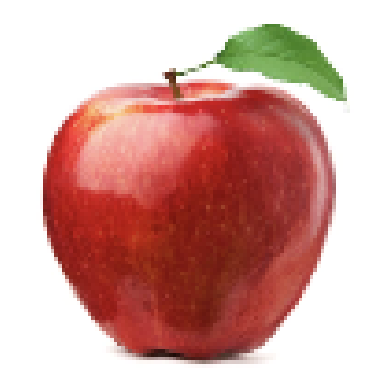

(100, 100, 3)


In [21]:
# Displaying the image
img = load_img('/content/dataset/train/' + "freshapples/Screen Shot 2018-06-08 at 4.59.36 PM.png", target_size=(100, 100))
plt.imshow(img)
plt.axis("off")
plt.show()

# Printing the shape of the image array
x = img_to_array(img)
print(x.shape)


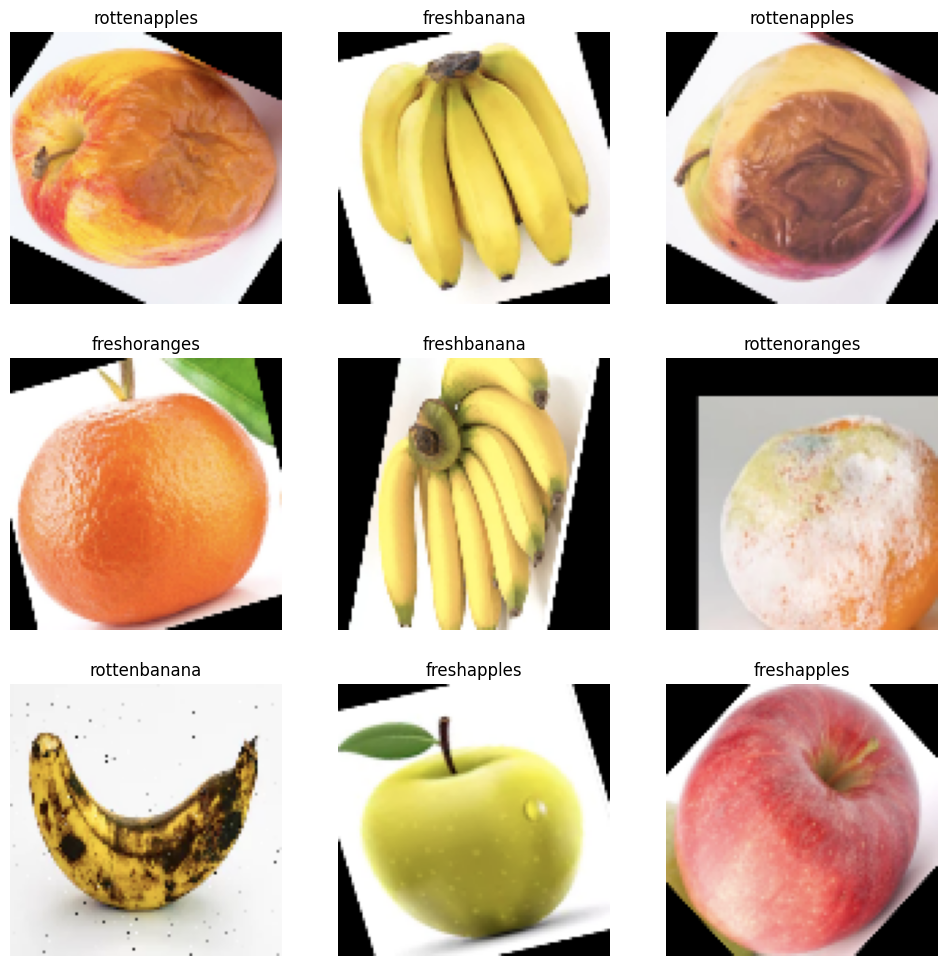

In [22]:
#Visualizing example images

fig = plt.figure(figsize =(12,12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_labels[labels[i]])
    plt.axis("off")

In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=batch_size).prefetch(buffer_size=AUTOTUNE)

##MODEL

In [24]:
#Creating the model

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))
model.add(Activation("softmax"))

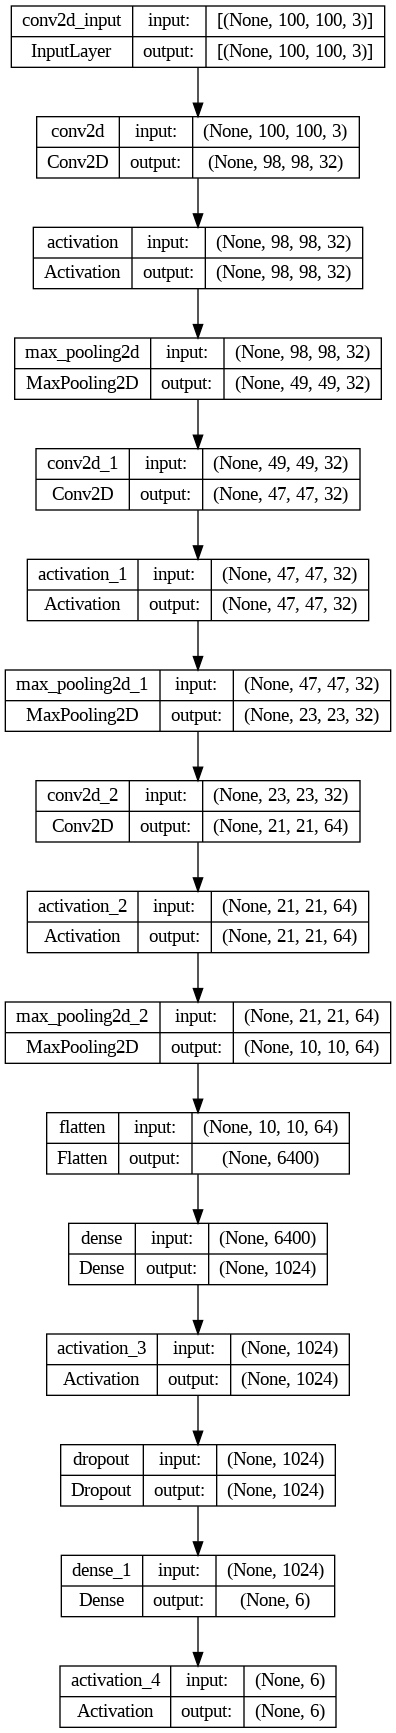

In [25]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
# Compiling the model

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
#Getting model's summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [28]:
#Creating an object of ImageDataGenerator.

train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip = True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [29]:
#Generating batches of Augmented data.

train_generator = train_datagen.flow_from_directory(
directory = '/content/dataset/train/',
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
directory = '/content/dataset/train/',
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 10901 images belonging to 6 classes.
Found 10901 images belonging to 6 classes.


##Training Model

In [30]:
epochs=16
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/16


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


273/273 [==============================] - 44s 100ms/step - loss: 3.3557 - accuracy: 0.5769 - val_loss: 0.7940 - val_accuracy: 0.7037
Epoch 2/16
273/273 [==============================] - 3s 11ms/step - loss: 0.6386 - accuracy: 0.7696 - val_loss: 0.5199 - val_accuracy: 0.8138
Epoch 3/16
273/273 [==============================] - 3s 11ms/step - loss: 0.4404 - accuracy: 0.8434 - val_loss: 0.5644 - val_accuracy: 0.7872
Epoch 4/16
273/273 [==============================] - 3s 11ms/step - loss: 0.3131 - accuracy: 0.8892 - val_loss: 0.3084 - val_accuracy: 0.8890
Epoch 5/16
273/273 [==============================] - 3s 11ms/step - loss: 0.1921 - accuracy: 0.9312 - val_loss: 0.2853 - val_accuracy: 0.9014
Epoch 6/16
273/273 [==============================] - 3s 11ms/step - loss: 0.1855 - accuracy: 0.9388 - val_loss: 0.2761 - val_accuracy: 0.9078
Epoch 7/16
273/273 [==============================] - 3s 12ms/step - loss: 0.1702 - accuracy: 0.9442 - val_loss: 0.3590 - val_accuracy: 0.8968
Epoch 8/

## Model Accuracy Plot

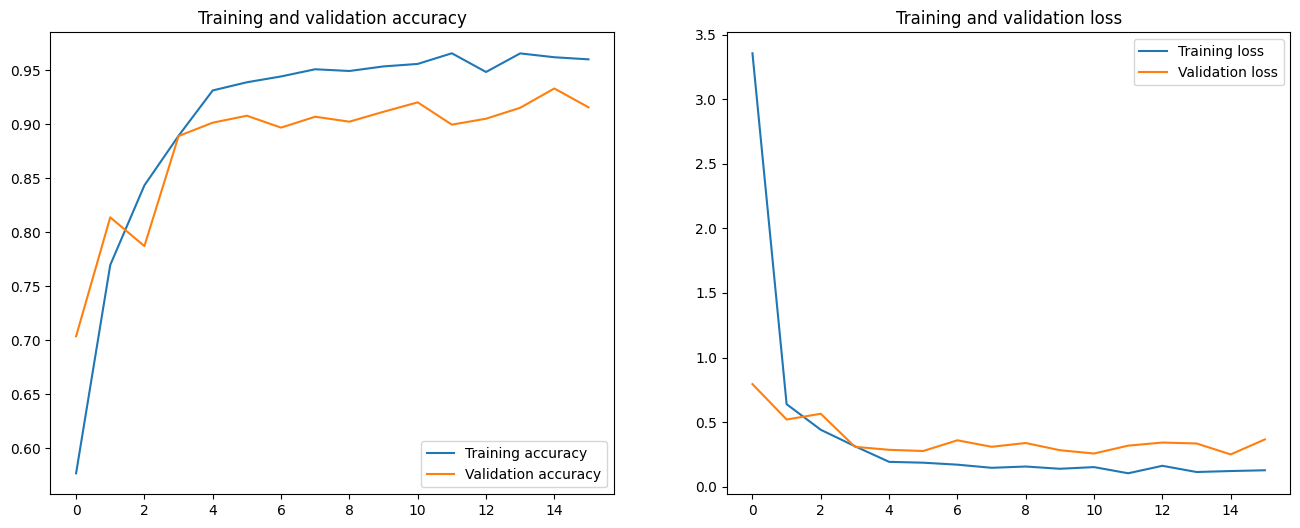

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training accuracy')
plt.plot(epochs_range, val_acc, label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()

## Testing

In [32]:
test_apple_url = "/content/dataset/train/freshapples/Screen Shot 2018-06-08 at 4.59.57 PM.png"
img = tf.keras.utils.load_img(test_apple_url, target_size=(img_h, img_w))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# create a batch

predictions_apple = model.predict(img_array)
score_apple = tf.nn.softmax(predictions_apple[0])
print(
    "This image most likely is a {} with a {:.2f} percent confidence."
    .format(class_labels[np.argmax(score_apple)], 100 * np.max(score_apple))
)

1/1 [==============================] - 0s 207ms/step
This image most likely is a freshapples with a 35.22 percent confidence.


In [33]:
test_url = "/content/dataset/test"

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_url,
    seed = 256,
    image_size=(img_h,img_w),
    shuffle=False #No shuffling for classification report
)

Found 2698 files belonging to 6 classes.


In [34]:
test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

85/85 [==============================] - 7s 86ms/step


In [35]:
results = model.evaluate(test_ds)
print("Test loss, test acc:", results)

85/85 [==============================] - 7s 83ms/step - loss: 0.2813 - accuracy: 0.9307
Test loss, test acc: [0.2813493609428406, 0.9306893944740295]


In [36]:
from sklearn.metrics import classification_report

y_test = np.concatenate(test_labels)
y_pred = np.array([np.argmax(s) for s in score])

print(classification_report(y_test, y_pred, target_names=class_labels))

               precision    recall  f1-score   support

  freshapples       0.97      0.94      0.96       395
  freshbanana       0.98      0.95      0.97       381
 freshoranges       0.89      0.93      0.91       388
 rottenapples       0.88      0.95      0.91       601
 rottenbanana       0.98      0.95      0.96       530
rottenoranges       0.91      0.87      0.89       403

     accuracy                           0.93      2698
    macro avg       0.93      0.93      0.93      2698
 weighted avg       0.93      0.93      0.93      2698



In [37]:
#Get a selection of images

image_batch, label_batch = next(iter(train_ds))
prediction_batch = model.predict(image_batch)
score_batch = tf.nn.softmax(prediction_batch)

1/1 [==============================] - 0s 29ms/step


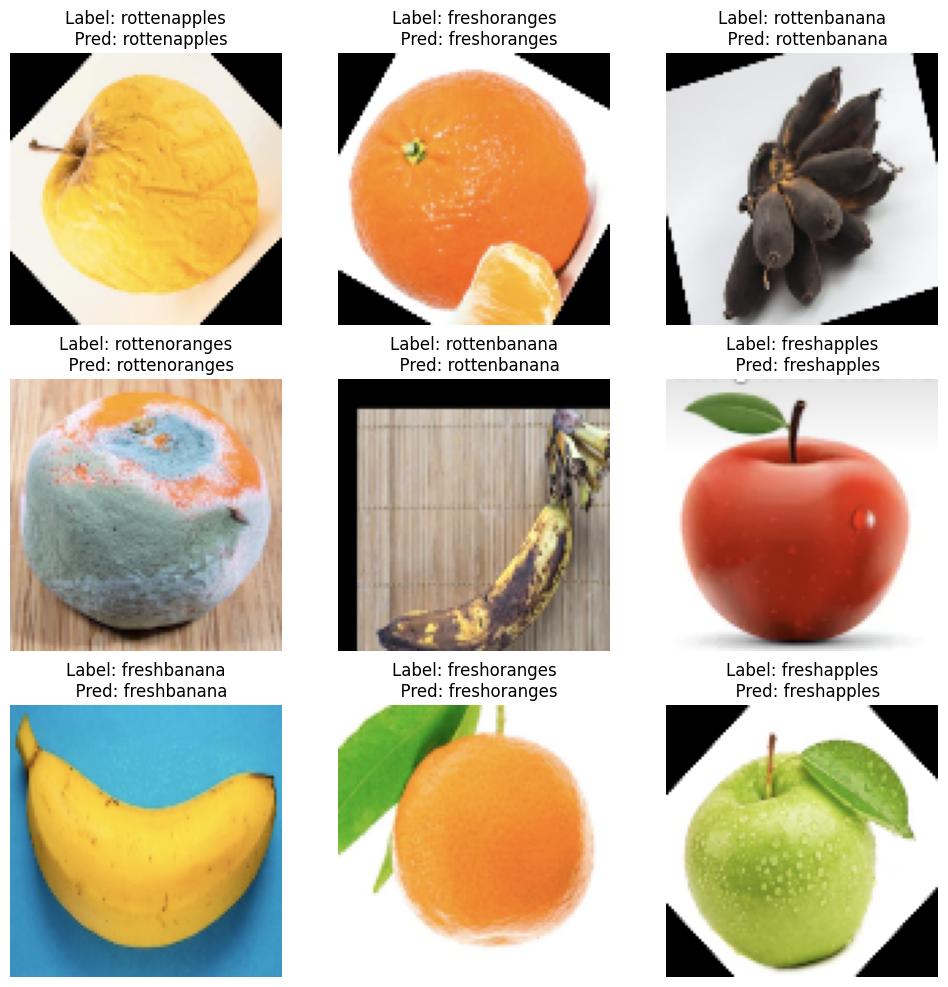

In [38]:
plt.figure(figsize=(12, 12))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title( "Label: " + class_labels[label] + "\n  Pred: " + class_labels[np.argmax(score_batch[i])])
  plt.axis("off")

## Saving Model

In [39]:
model.save(filepath="save_model/")

In [40]:
model.save(model_name)

In [41]:
converter = tf.lite.TFLiteConverter.from_saved_model('save_model')
tflite_model = converter.convert()
open("fruitrcog.tflite", "wb").write(tflite_model)

26361788

In [56]:
! zip -r /content/dataset/save_model.zip /content/dataset/save_model/

updating: content/dataset/save_model/ (stored 0%)
updating: content/dataset/save_model/keras_metadata.pb (deflated 92%)
updating: content/dataset/save_model/saved_model.pb (deflated 89%)
updating: content/dataset/save_model/assets/ (stored 0%)
updating: content/dataset/save_model/variables/ (stored 0%)
updating: content/dataset/save_model/variables/variables.index (deflated 63%)
updating: content/dataset/save_model/variables/variables.data-00000-of-00001 (deflated 12%)
updating: content/dataset/save_model/fingerprint.pb (stored 0%)
